In [34]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv('../data/processed/processed_data.csv')

# filter certain columns by index and last column
df = df.iloc[:, list(range(1, 10)) + list(range(38, 50))]
X, y = df.drop('position', axis=1), df['position']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)






In [35]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
print(f'Train score: {rf.score(X_train, y_train)}')

Train score: 0.9908347114631386


In [39]:
# train ANN
from sklearn.neural_network import MLPClassifier
# columns = 50
# rows = 143000

mlp = MLPClassifier(hidden_layer_sizes=(50, 25, 10))
mlp.fit(X_train, y_train)
print(f'Train score: {mlp.score(X_train, y_train)}')

Train score: 0.7553050744190095


In [42]:
print(f'Train score: {mlp.score(X_train, y_train)}')


Train score: 0.7553050744190095


/home/ahmed/anaconda3/envs/cmps460/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


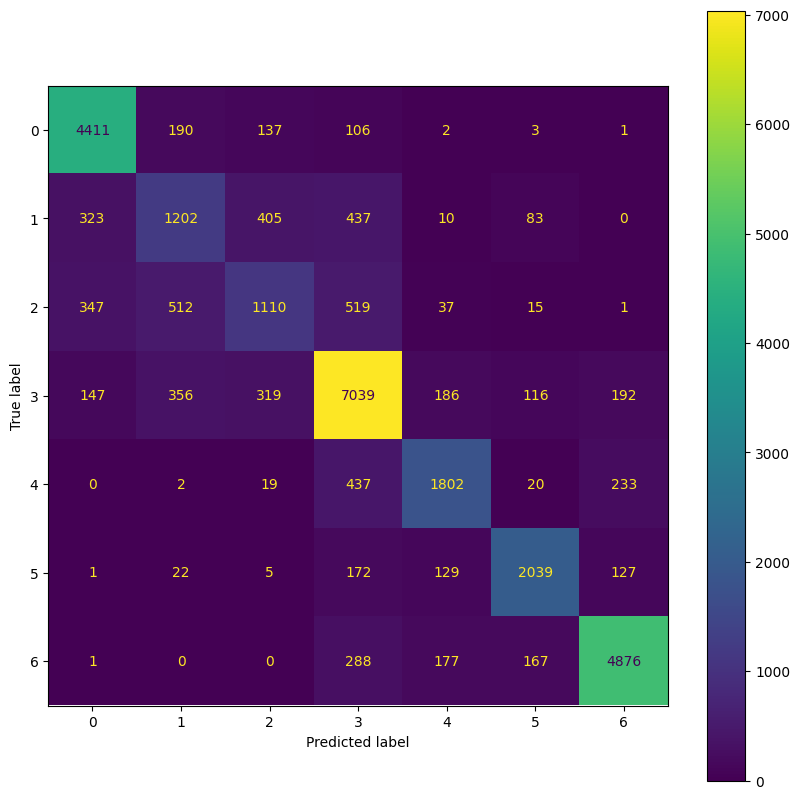

In [36]:
# draw confusion matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(rf, X_test, y_test, ax=ax)


<AxesSubplot: >

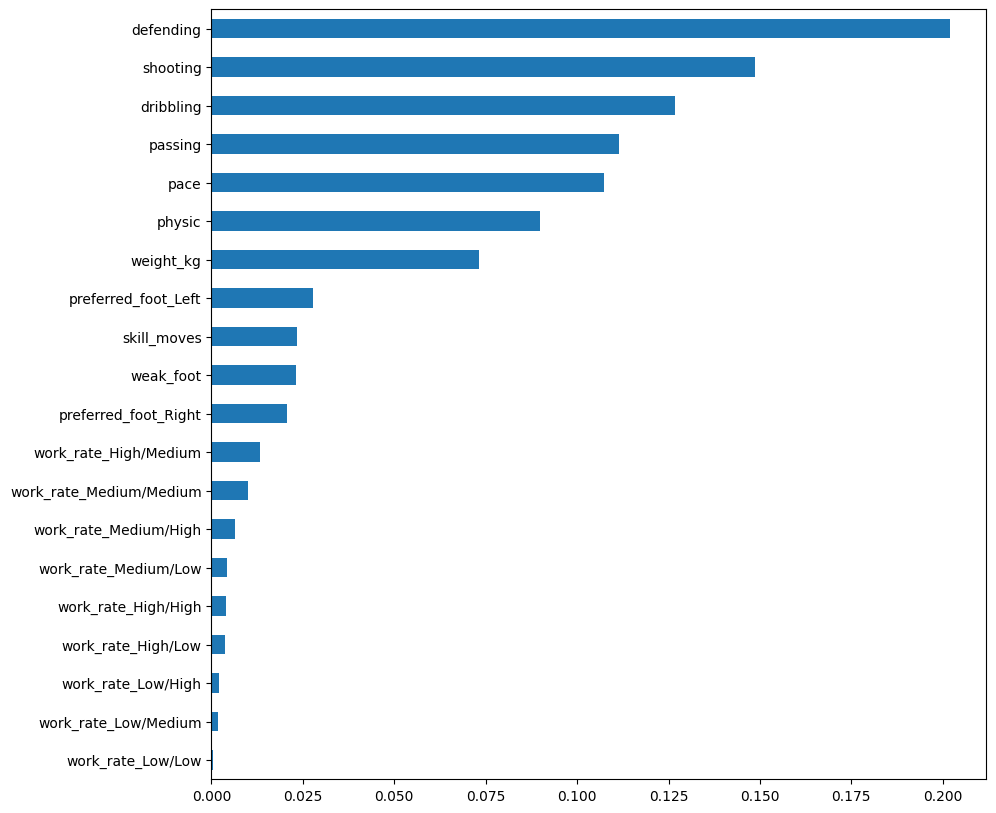

In [37]:
# draw feature importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
pd.Series(rf.feature_importances_, index=X.columns).sort_values().plot.barh(ax=ax)
